# Gathering Data
> Data source 1: A provided CSV file containing an enhanced version of the WeRateDogs twitter archive.

In [98]:
# Import the provided twitter archive CSV
import pandas as pd

archive = pd.read_csv('twitter-archive-enhanced.csv')

> Data source 2: A hosted file containing dog breed predictions which correspond to the enhanced twitter archive data.

In [99]:
# Download dog breed predictions from web, save content to CSV, and import
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.csv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image-predictions.csv', sep='\\t', engine='python')

> Data source 3: Additional tweet data retrieved with the Twitter API which corresponds to the enhanced twitter archive.

In [100]:
# Retrieve additional tweet data using the Twitter API
import json
import tweepy
from config import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_data = []  # Store tweet JSON objects

# Use archived tweet IDs to pull tweets
for _id in archive['tweet_id'].values:
    try:
        tweet = api.get_status(_id, tweet_mode='extended')
    except tweepy.TweepError as error:
        # Ignore errors raised due to deleted tweets
        pass
    else:
        tweet_data.append(tweet._json)

Rate limit reached. Sleeping for: 621
Rate limit reached. Sleeping for: 622


In [101]:
# Write tweet JSON object to TXT file
json_txt = 'tweet_json.txt'
with open(json_txt, 'w') as f:
    for twt in tweet_data:
        json.dump(twt, f)
        f.write('\n')

In [102]:
# View tweet available areas of interest
with open(json_txt, 'r') as f:
    keys = json.loads(f.readlines()[0]).keys()
    
keys

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [142]:
# Build new DataFrame from TXT file
refined_json = []

with open(json_txt, 'r') as f:
    for line in f.readlines():
        obj = json.loads(line)
        areas_of_interest = {
            'tweet_id': obj['id'],
            'retweet_count': obj['retweet_count'],
            'favorite_count': obj['favorite_count'],
        }
        refined_json.append(areas_of_interest)
        
tweets_from_api = pd.DataFrame(refined_json, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweets_from_api.to_csv('tweets_from_api.csv', index=False)

# Assessing Data
## Data source 1: Enhanced twitter archive CSV file

In [143]:
archive.head()  # View data slice

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> None of the first 5 dogs were given a dog stage (`doggo`, `floofer`, `pupper`, `puppo`) classification

In [144]:
archive['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [145]:
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

> The source values appear overly robust

In [146]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> Some tweets are classified as retweets or replies, which are not needed for this analysis. Some of these data types will need to be addressed for quality.
> `expanded_urls` contains null values.

In [147]:
archive['tweet_id'].nunique()  # Check for duplicate tweets

2356

In [148]:
archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [149]:
archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

> Rating system does not always match expectation.

In [150]:
archive['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [151]:
archive['name'].tail(15)

2341    None
2342    None
2343    None
2344    None
2345     the
2346     the
2347       a
2348       a
2349      an
2350       a
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, dtype: object

> `name` column is of low quality.

> ### Quality Issues
- User/tweet IDs are not numerically meaningful and should be saved as strings.
- `timestamp` fields are numerically meaningful and should be of type datetime, not object (string).
- 78 tweets are replies, this is not meaningful data.
- 181 tweets are retweets, this is not meaningful data.
- Not every tweet contains a dog stage classification.
- Dog ratings are provided with denominators of 10 and numerators that are greater than 10. Both denominator and numerator fields contain minimum values of 0 and excessive maximum values (170-1776).
- `name` contains errors and is often missing (labelled None).
- Missing data is sometimes incorrectly labelled as None (a string value).
- `source` is overly robust.
- Some `expanded_urls` are missing.
- `floofer` isn't the correct dog stage name.

> ### Tidy Issues
- Dog stage (`doggo`, `floofer`, `pupper`, `puppo`) can be represented as a single column.
- Since all `rating_denominator`s should equal 10, this field can be eliminated.

## Data source 2: Image predictions hosted on Udacity server

In [152]:
image_predictions.head()  # View data slice

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [153]:
len(image_predictions.index)

2075

In [154]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [155]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [156]:
image_predictions.tail()  # View data slice

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [157]:
image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [158]:
image_predictions['tweet_id'].nunique()

2075

> ### Quality Issues
- `tweet_id`s are not numerically meaningful and should be saved as strings.
- The size of the image prediction dataset does not equal the size of the enhanced twitter archive dataset.
- The boolean columns should be represented in binary.

## Data source 3: Additional tweet data gathered using Twitter API

In [159]:
tweets_from_api = pd.read_csv('tweets_from_api.csv')
tweets_from_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7688,36100
1,892177421306343426,5687,31142
2,891815181378084864,3770,23449
3,891689557279858688,7854,39385
4,891327558926688256,8460,37617


In [160]:
tweets_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [161]:
tweets_from_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2697.937366,7538.689833
std,6.823170e+16,4560.937140,11702.517105
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,546.000000,1315.500000
50%,7.182469e+17,1266.000000,3278.000000
75%,7.986692e+17,3137.000000,9231.000000
max,8.924206e+17,77589.000000,155716.000000


In [162]:
tweets_from_api.nunique()

tweet_id          2331
retweet_count     1684
favorite_count    1993
dtype: int64

> ### Quality Issues
- `tweet_id`s are not numerically meaningful and should be saved as strings.

# Cleaning Data

> ## Goals:
- Set all ID values to type object (string)
- Represent boolean values as binary
- Set all `timestamp` values to type datetime
- Remove tweets that are retweets or replies
- Correct rating system, remove denominator column
- Merge dog stage columns
- Correct dog stage name (`floofer`)
- Drop tweets where the dog breed was not classified
- Set missing values to type NaN
- Drop `name` and `expanded_urls` columns since this data is inconsistent and not helpful in analysis
- Merge all (3) datasets to a single master dataset
- Simplify `source` column

> ### Step 1: Build a single unified DataFrame that contains all the gathered tweet data. Only data for `tweet_id`s that are found in all 3 data sources are included.

In [220]:
archive_img_pred_join = pd.merge(archive, image_predictions, on='tweet_id', how='inner')
master_df = pd.merge(archive_img_pred_join, tweets_from_api, on='tweet_id', how='inner')
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7688,36100
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5687,31142
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3770,23449
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7854,39385
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8460,37617


In [221]:
master_df['tweet_id'].nunique(), len(master_df.index)

(2059, 2059)

> ### Step 2: Remove data that is not of interest in this analysis, such as: tweets classified as retweets or replies, dog names, expanded URLs, and the jpg_url.

In [222]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

In [223]:
# Remove rows pertaining to retweets or replies

master_df = master_df[master_df['in_reply_to_status_id'].isnull()]
master_df = master_df[master_df['retweeted_status_id'].isnull()]
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1964 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1964 non-null   object 
 4   source                      1964 non-null   object 
 5   text                        1964 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1964 non-null   object 
 10  rating_numerator            1964 non-null   int64  
 11  rating_denominator          1964 non-null   int64  
 12  name                        1964 non-null   object 
 13  doggo                       1964 

In [224]:
# Remove unnecessary columns

master_df.drop(
    columns=[
        'in_reply_to_status_id', 
        'in_reply_to_user_id', 
        'retweeted_status_id', 
        'retweeted_status_user_id', 
        'retweeted_status_timestamp',
        'name',
        'expanded_urls',
        'jpg_url'
    ], 
    inplace=True
)

In [225]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2058
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1964 non-null   int64  
 1   timestamp           1964 non-null   object 
 2   source              1964 non-null   object 
 3   text                1964 non-null   object 
 4   rating_numerator    1964 non-null   int64  
 5   rating_denominator  1964 non-null   int64  
 6   doggo               1964 non-null   object 
 7   floofer             1964 non-null   object 
 8   pupper              1964 non-null   object 
 9   puppo               1964 non-null   object 
 10  img_num             1964 non-null   int64  
 11  p1                  1964 non-null   object 
 12  p1_conf             1964 non-null   float64
 13  p1_dog              1964 non-null   bool   
 14  p2                  1964 non-null   object 
 15  p2_conf             1964 non-null   float64
 16  p2_dog

> ### Step 3: Address issues with dog stage classification and NaN values.

In [227]:
master_df['doggo'].value_counts()

None     1892
doggo      72
Name: doggo, dtype: int64

In [228]:
master_df['floofer'].value_counts()

None       1956
floofer       8
Name: floofer, dtype: int64

In [229]:
master_df['pupper'].value_counts()

None      1755
pupper     209
Name: pupper, dtype: int64

In [230]:
master_df['puppo'].value_counts()

None     1941
puppo      23
Name: puppo, dtype: int64

In [231]:
# Check for conflicting labelling of dog stages

import numpy as np

stages = ['doggo', 'floof', 'pupper', 'puppo']
stage_errors = {}

def dog_stage_classifier(row):
    _class = []
    if row['doggo'] == 'doggo':
        _class.append('doggo')
    if row['floofer'] == 'floofer':
        _class.append('floofer')
    if row['pupper'] == 'pupper':
        _class.append('pupper')
    if row['puppo'] == 'puppo':
        _class.append('puppo')
    if len(_class) == 0:
        _class.append(np.nan)
    if len(_class) == 1:
        return _class[0]
    else:
        stage_errors[row['tweet_id']] = {}
        stage_errors[row['tweet_id']]['stages'] = _class
        stage_errors[row['tweet_id']]['text'] = row['text']
        return np.nan  # Temporarily label as null

In [232]:
master_df['dog_stage'] = master_df.apply(lambda row: dog_stage_classifier(row), axis=1)

In [233]:
# View data where a dog stage label was duplicated

for item in stage_errors.keys():
    print(item, stage_errors[item], '\n')

855851453814013952 {'stages': ['doggo', 'puppo'], 'text': "Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"} 

854010172552949760 {'stages': ['doggo', 'floofer'], 'text': "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"} 

817777686764523521 {'stages': ['doggo', 'pupper'], 'text': 'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7'} 

808106460588765185 {'stages': ['doggo', 'pupper'], 'text': 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho'} 

801115127852503040 {'stages': ['doggo', 'pupper'], 'text': "This is Bones. He's being haunted by another dogg

In [250]:
# These tweet_ids correspond to multiple dogs
multiple_dogs_id = [808106460588765185, 759793422261743616, 741067306818797568, 733109485275860992]

# These tweet_ids correspond to non-dogs
non_dog = [854010172552949760, 751583847268179968]

# These are the corrected dog stages for the remaining tweet_ids
dog_stage_corrections = {
    855851453814013952: 'puppo',
    817777686764523521: 'pupper',
    801115127852503040: 'doggo',
    785639753186217984: 'doggo'
}


# Extend one problematic list with the other so all tweet ids can be dropped in a single operation
non_dog.extend(multiple_dogs_id)

print('before drop', len(master_df.index))

# Remove tweet ids with tainted data
master_df = master_df[~master_df['tweet_id'].isin(non_dog)]

print('after drop', len(master_df.index))

before drop 1964
after drop 1958


In [260]:
# Drop redundant columns and correct dog_stage name ('floof')

master_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
master_df.loc[master_df.dog_stage == 'floofer', 'dog_stage'] = 'floof'

C:\Users\brand\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\brand\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [261]:
master_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7688,36100,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5687,31142,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3770,23449,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7854,39385,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8460,37617,NaN


> ### Step 4: Address data type errors
- Set all ID values to type object (string)
- Represent boolean values as binary
- Set all `timestamp` values to type datetime

In [263]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1958 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1958 non-null   int64  
 1   timestamp           1958 non-null   object 
 2   source              1958 non-null   object 
 3   text                1958 non-null   object 
 4   rating_numerator    1958 non-null   int64  
 5   rating_denominator  1958 non-null   int64  
 6   img_num             1958 non-null   int64  
 7   p1                  1958 non-null   object 
 8   p1_conf             1958 non-null   float64
 9   p1_dog              1958 non-null   bool   
 10  p2                  1958 non-null   object 
 11  p2_conf             1958 non-null   float64
 12  p2_dog              1958 non-null   bool   
 13  p3                  1958 non-null   object 
 14  p3_conf             1958 non-null   float64
 15  p3_dog              1958 non-null   bool   
 16  retwee

In [264]:
# Modify data types

master_df['tweet_id'] = master_df['tweet_id'].astype(str)
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])

C:\Users\brand\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\brand\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [268]:
master_df.p1_dog.value_counts()

True     1450
False     508
Name: p1_dog, dtype: int64

In [269]:
master_df.p2_dog.value_counts()

True     1468
False     490
Name: p2_dog, dtype: int64

In [270]:
master_df.p3_dog.value_counts()

True     1420
False     538
Name: p3_dog, dtype: int64

In [272]:
# Reassign columns values from boolean to binary

def assign_binary_classifier(row, col):
    if row[col] == True:
        return 1
    return 0


for column in ['p1_dog', 'p2_dog', 'p3_dog']:
    master_df[column] = master_df.apply(lambda row: assign_binary_classifier(row, column), axis=1)

C:\Users\brand\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [274]:
master_df.p1_dog.value_counts()

1    1450
0     508
Name: p1_dog, dtype: int64

In [275]:
master_df.p2_dog.value_counts()

1    1468
0     490
Name: p2_dog, dtype: int64

In [276]:
master_df.p3_dog.value_counts()

1    1420
0     538
Name: p3_dog, dtype: int64

> ### Step 5: Simplify the `source` column.

In [277]:
master_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1920
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [278]:
# Remove HTML tags, leave content only

master_df.loc[master_df.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'source'] = 'Twitter for iPhone'
master_df.loc[master_df.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'source'] = 'Twitter Web Client'
master_df.loc[master_df.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'source'] = 'TweetDeck'
master_df.source.value_counts()

C:\Users\brand\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Twitter for iPhone    1920
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

> ### Step 6: Correct fault rating system, remove denominator column.

In [280]:
master_df.rating_numerator.value_counts()

12      440
10      416
11      391
13      249
9       150
8        95
7        52
14       33
5        32
6        32
3        19
4        16
2         9
1         5
1776      1
24        1
26        1
420       1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [285]:
rating_test_df = master_df[master_df.rating_numerator > 14]
rating_test_df['text'].tolist()

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
 "Happy S

> Texts for the dogs that received rating outliers (excessively high) indicate the following:
- Some images contain multiple dogs
- Some ratings were given for special occasions (1776, 420)
- 1 image didn't receive a rating at all
- Some ratings contain floating point numerators

> Since these cases represent such a small percentage of the sample I will remove them from the dataset.

In [286]:
master_df = master_df[master_df.rating_numerator <= 14]

In [287]:
master_df.rating_numerator.value_counts()

12    440
10    416
11    391
13    249
9     150
8      95
7      52
14     33
6      32
5      32
3      19
4      16
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

In [292]:
rating_test_df = master_df[master_df.rating_numerator <= 3]
rating_test_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
241,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plag...,0,10,3,swing,0.967066,0,American_Staffordshire_terrier,0.012731,1,Staffordshire_bullterrier,0.007039,1,3019,22405,NaN
604,777885040357281792,2016-09-19 15:00:20+00:00,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seem...,3,10,1,Afghan_hound,0.123529,1,basset,0.119682,1,Siberian_husky,0.108709,1,1647,6407,NaN
978,718246886998687744,2016-04-08 01:19:36+00:00,Twitter for iPhone,This is Alexanderson. He's got a weird ass bir...,3,10,1,Chihuahua,0.354488,1,carton,0.159672,0,Siberian_husky,0.057498,1,499,1892,NaN
1029,711306686208872448,2016-03-19 21:41:44+00:00,Twitter for iPhone,What hooligan sent in pictures w/out a dog in ...,3,10,1,leatherback_turtle,0.280835,0,loggerhead,0.123290,0,Dandie_Dinmont,0.086792,1,731,3272,NaN
1085,706901761596989440,2016-03-07 17:58:08+00:00,Twitter for iPhone,This is Elliot. He's blocking the roadway. Dow...,3,10,1,wild_boar,0.859499,0,hog,0.128981,0,warthog,0.011318,0,590,2037,NaN
1170,699088579889332224,2016-02-15 04:31:20+00:00,Twitter for iPhone,This is Charl. He's a bully. Chucks that dumbb...,3,10,1,mousetrap,0.456186,0,banded_gecko,0.258677,0,common_iguana,0.061783,0,630,2229,NaN
1231,693590843962331137,2016-01-31 00:25:18+00:00,Twitter for iPhone,Meet Phil. He's big af. Currently destroying t...,3,10,1,dining_table,0.383448,0,grey_fox,0.103191,0,Siamese_cat,0.098256,0,1946,5024,pupper
1337,686003207160610816,2016-01-10 01:54:44+00:00,Twitter for iPhone,This is Hammond. He's a peculiar pup. Loves lo...,3,10,1,damselfly,0.190786,0,common_newt,0.098131,0,whiptail,0.088958,0,621,1818,NaN
1419,681302363064414209,2015-12-28 02:35:15+00:00,Twitter for iPhone,This is Chuck. He's a neat dog. Very flexible....,3,10,1,frilled_lizard,0.326259,0,tailed_frog,0.104539,0,axolotl,0.072479,0,1802,3906,NaN
1482,678675843183484930,2015-12-20 20:38:24+00:00,Twitter for iPhone,Exotic pup here. Tail long af. Throat looks sw...,2,10,1,maze,0.339850,0,streetcar,0.099688,0,sundial,0.084808,0,1435,2821,NaN


In [293]:
rating_test_df['text'].tolist()

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
 "This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M",
 "This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl",
 "What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz",
 "This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu",
 "This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7",
 "Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx",
 "This is Hammond. He's a pecul

In [294]:
rating_test_df.p1.value_counts()

snail                 2
Maltese_dog           2
mousetrap             1
common_iguana         1
robin                 1
lacewing              1
hamster               1
walking_stick         1
leatherback_turtle    1
wild_boar             1
slug                  1
scorpion              1
seat_belt             1
hen                   1
electric_fan          1
coho                  1
box_turtle            1
paper_towel           1
Afghan_hound          1
swing                 1
maze                  1
toilet_seat           1
dining_table          1
pug                   1
damselfly             1
triceratops           1
three-toed_sloth      1
Chihuahua             1
frilled_lizard        1
water_bottle          1
Angora                1
tick                  1
Name: p1, dtype: int64

> Tweet text and value counts for the most confident prediction indicate that dogs who received unordinarily low rating numerators may not be images of actual dogs. 

> Since these cases represent such a small percentage of the sample I will remove them in an effort to maintain data integrity.

In [295]:
master_df = master_df[master_df.rating_numerator > 3]

In [296]:
master_df.rating_denominator.value_counts()

10    1903
11       2
20       1
Name: rating_denominator, dtype: int64

In [299]:
# Remove very small number of unordinary rating denominators to maintain data integrity, then drop column

master_df = master_df[master_df.rating_denominator == 10]
master_df.drop('rating_denominator', axis=1, inplace=True)

In [300]:
master_df

,tweet_id,timestamp,source,text,rating_numerator,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,1,orange,0.097049,0,bagel,0.085851,0,banana,0.076110,0,7688,36100,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,1,Chihuahua,0.323581,1,Pekinese,0.090647,1,papillon,0.068957,1,5687,31142,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,1,Chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1,3770,23449,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,1,paper_towel,0.170278,0,Labrador_retriever,0.168086,1,spatula,0.040836,0,7854,39385,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,2,basset,0.555712,1,English_springer,0.225770,1,German_short-haired_pointer,0.175219,1,8460,37617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1,40,96,NaN
2055,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1,131,272,NaN
2056,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1,41,112,NaN
2057,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1,42,121,NaN


# Storing, Analyzing, and Visualizing Data

> ### Goal: Show at least (3) insights and one (1) visualization.

In [308]:
# Save DataFrame to CSV

master_df.to_csv('twitter_archive_master.csv')

In [355]:
master_df.rating_numerator.describe()

count    1903.000000
mean       10.672622
std         1.904536
min         4.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [387]:
confident_df = master_df[master_df.p1_conf > .75]
confident_df.rating_numerator.describe()

count    662.000000
mean      10.918429
std        1.772882
min        4.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [392]:
avg_conf_df = master_df[master_df.p1_conf > .45]
avg_conf_df = avg_conf_df[avg_conf_df.p1_conf < .55]
avg_conf_df.rating_numerator.describe()

count    215.000000
mean      10.944186
std        1.908332
min        4.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

In [361]:
unsure_df = master_df[master_df.p1_conf < .25]
unsure_df.rating_numerator.describe()

count    233.000000
mean      10.253219
std        2.015094
min        4.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       14.000000
Name: rating_numerator, dtype: float64

## Insight
- ### Image rating numerators became more spread out as the classifier's condidence level dropped.

0    12
dtype: int64

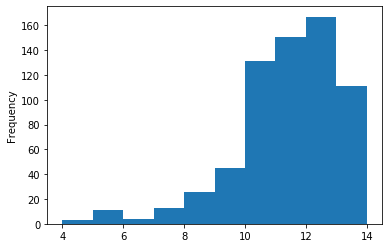

In [402]:
confident_df.rating_numerator.plot(kind='hist')
confident_df.rating_numerator.mode()

0    12
dtype: int64

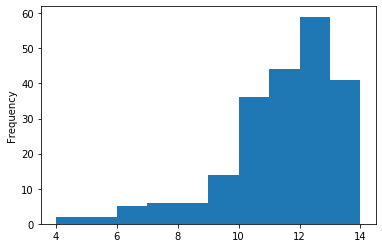

In [403]:
avg_conf_df.rating_numerator.plot(kind='hist')
avg_conf_df.rating_numerator.mode()

0    10
dtype: int64

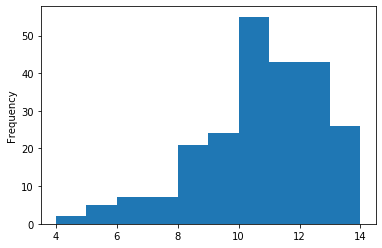

In [404]:
unsure_df.rating_numerator.plot(kind='hist')
unsure_df.rating_numerator.mode()

## Insight
- ### When comparing the rating numerator distributions for varying classifier confidence levels each plot was skewed to the left.
- ### As we approach the lower confidence level bound the mode is pulled toward the mean.

In [411]:
master_df.p1.value_counts()

golden_retriever      130
Labrador_retriever     89
Pembroke               88
Chihuahua              77
pug                    53
                     ... 
Egyptian_cat            1
wooden_spoon            1
leatherback_turtle      1
standard_schnauzer      1
dhole                   1
Name: p1, Length: 355, dtype: int64

In [430]:
golden_df = master_df[master_df.p1 == 'golden_retriever']
lab_df = master_df[master_df.p1 == 'Labrador_retriever']
pembroke_df = master_df[master_df.p1 == 'Pembroke']

In [431]:
golden_df.describe()

,rating_numerator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
count,130.000000,130.000000,130.000000,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,11.553846,1.300000,0.726921,1.0,0.112243,0.984615,0.043762,0.861538,3122.915385,11188.569231
std,1.335627,0.630614,0.218625,0.0,0.097184,0.123553,0.045542,0.346720,3750.410938,11879.937716
min,5.000000,1.000000,0.140394,1.0,0.002228,0.000000,0.000453,0.000000,46.000000,175.000000
25%,11.000000,1.000000,0.608945,1.0,0.036696,1.000000,0.009154,1.000000,1064.500000,3252.500000
50%,12.000000,1.000000,0.776138,1.0,0.090681,1.000000,0.024669,1.000000,2003.500000,7370.000000
75%,12.000000,1.000000,0.902756,1.0,0.165288,1.000000,0.071391,1.000000,3800.750000,14961.750000
max,14.000000,4.000000,0.993830,1.0,0.454937,1.000000,0.203163,1.000000,24494.000000,78394.000000


In [432]:
lab_df.describe()

,rating_numerator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
count,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,11.089888,1.146067,0.645665,1.0,0.146121,0.898876,0.054789,0.853933,3439.876404,10918.415730
std,1.336893,0.465895,0.232856,0.0,0.103004,0.303200,0.050751,0.355175,8623.022090,18773.989988
min,7.000000,1.000000,0.195835,1.0,0.001688,0.000000,0.000694,0.000000,84.000000,284.000000
25%,10.000000,1.000000,0.458746,1.0,0.056639,1.000000,0.016497,1.000000,547.000000,2024.000000
50%,11.000000,1.000000,0.680251,1.0,0.137710,1.000000,0.036007,1.000000,1456.000000,5073.000000
75%,12.000000,1.000000,0.836052,1.0,0.201697,1.000000,0.077396,1.000000,3604.000000,14796.000000
max,13.000000,4.000000,0.996709,1.0,0.403420,1.000000,0.184246,1.000000,77589.000000,155716.000000


In [433]:
pembroke_df.describe()

,rating_numerator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
count,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,11.443182,1.261364,0.717223,1.0,0.139614,0.931818,0.041300,0.931818,2817.238636,10531.806818
std,1.721119,0.702938,0.227037,0.0,0.112828,0.253502,0.049234,0.253502,2814.300877,11446.650904
min,4.000000,1.000000,0.134081,1.0,0.003216,0.000000,0.000023,0.000000,77.000000,156.000000
25%,11.000000,1.000000,0.541385,1.0,0.033184,1.000000,0.003414,1.000000,940.250000,2912.750000
50%,12.000000,1.000000,0.767625,1.0,0.111828,1.000000,0.021313,1.000000,1749.000000,5937.000000
75%,12.000000,1.000000,0.932723,1.0,0.227522,1.000000,0.062449,1.000000,3696.750000,14026.750000
max,14.000000,4.000000,0.993449,1.0,0.451038,1.000000,0.241878,1.000000,16359.000000,64294.000000


In [408]:
master_df.retweet_count.describe()

count     1903.000000
mean      2474.496059
std       4433.184301
min         11.000000
25%        551.000000
50%       1192.000000
75%       2834.000000
max      77589.000000
Name: retweet_count, dtype: float64

In [438]:
pop_dog_list = master_df.p1.value_counts().index.tolist()[:5]
avg_retweet_count = []
avg_fav_count = []
for i in range(len(pop_dog_list)):
    df = master_df[master_df.p1 == pop_dog_list[i]]
    avg_retweet_count.append(df.retweet_count.mean())
    avg_fav_count.append(df.favorite_count.mean())

In [439]:
avg_fav_count

[11188.569230769232,
 10918.41573033708,
 10531.806818181818,
 8277.532467532468,
 5477.433962264151]

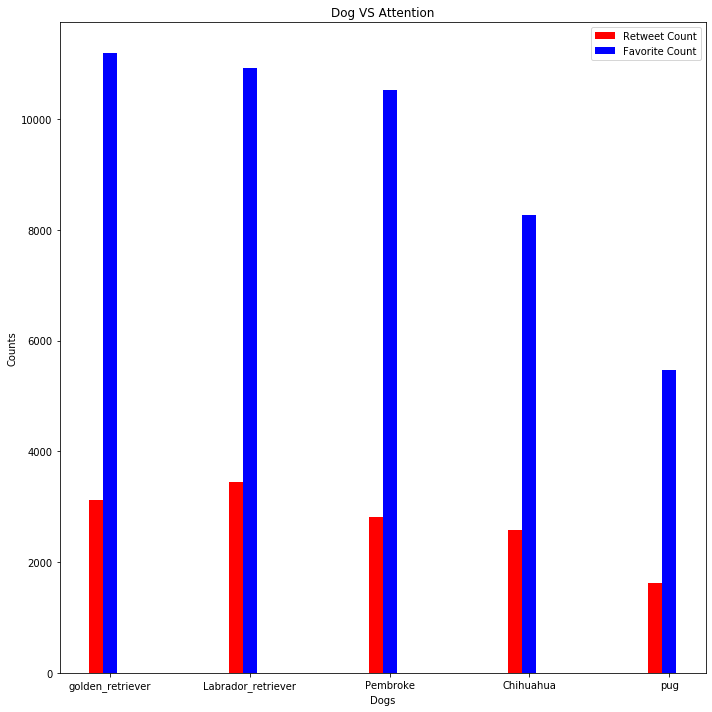

In [440]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
index = np.arange(len(pop_dog_list))
width = .1

retweets = plt.bar(index, avg_retweet_count, width, color='r', label='Retweet Count')
favs = plt.bar(index+width, avg_fav_count, width, color='b', label='Favorite Count')
plt.xlabel('Dogs')
plt.ylabel('Counts')
plt.title('Dog VS Attention')
plt.xticks(index + width, pop_dog_list)
plt.legend()
plt.tight_layout()
plt.show()

## Insight
- ### Images containing dogs that were predicted to be labrador retrievers were more likely to be favorited than images containing dogs that were predicted to be golden retrievers.